In [6]:
import math
import cv2
import numpy as np
from matplotlib import pyplot as plt
#%matplotlib tk
angle=10
class Linear_Transform():
    def __init__(self,vect,matrix):
        self.fig,self.ax=plt.subplots(nrows=1,ncols=1,figsize=(10,10))
        self.ox=0
        self.oy=0
        self.gx=4
        self.gy=4
        self.box=None
        self.Xaxis=None
        self.Yaxis=None
        self.Xs=[]
        self.Ys=[]
        self.matrix=matrix
        self.vect=vect
        self._Box()
        self._Axis()
        self._Grid()
        self.Transform_All()
        self.Draw()
        
    def Draw(self):
        marker='b'
        self.ax.plot(self.vect[:,0],self.vect[:,1],marker,linewidth=5)
        self.ax.plot(self.box[:,0],self.box[:,1],marker)
        self.ax.plot(self.Xaxis[:,0],self.Xaxis[:,1],marker+'--')
        self.ax.plot(self.Yaxis[:,0],self.Yaxis[:,1],marker+'--')
        for xx,yy in zip(self.Xs,self.Ys):
            #print(xx)
            self.ax.plot(xx[:,0],xx[:,1],marker+'--')
            self.ax.plot(yy[:,0],yy[:,1],marker+'--')
        
        marker='c'
        self.ax.plot(self.tvect[:,0],self.tvect[:,1],marker,linewidth=5)
        self.ax.plot(self.tbox[:,0],self.tbox[:,1],marker)
        self.ax.plot(self.TXaxis[:,0],self.TXaxis[:,1],marker+'--')
        self.ax.plot(self.TYaxis[:,0],self.TYaxis[:,1],marker+'--')
        for txx,tyy in zip(self.txx,self.tyy):
            self.ax.plot(txx[:,0],txx[:,1],marker+'--')
            self.ax.plot(tyy[:,0],tyy[:,1],marker+'--')
        plt.show()

    
    def _Box(self):
        dx=1
        dy=1
        pts=[[self.ox-dx,self.oy+dy],
        [self.ox+dx,self.oy+dy],
        [self.ox+dx,self.oy-dy],
        [self.ox-dx,self.oy-dy],
        [self.ox-dx,self.oy+dy]]
        self.box=np.array(pts,dtype=np.float64)
        return self.box
    def _Axis(self):
        gx=self.gx
        gy=self.gy
        ax1=[[self.ox-gx//2,self.oy],
        [self.ox+gx//2,self.oy]]
        ax2=[[self.ox,self.oy-gy//2],
        [self.ox,self.oy+gy//2]]
        self.Xaxis=np.array(ax1,dtype=np.float64)
        self.Yaxis=np.array(ax2,dtype=np.float64)
        return self.Xaxis,self.Yaxis
    def _Grid(self):
        _y=-self.gy//2
        _x=-self.gx//2
        for i in range(self.gx+1):
            ax1=[[self.ox-self.gx//2,_y],
                 [self.ox+self.gx//2,_y]]
            self.Xs.append(ax1)
            _y+=1
        for i in range(self.gy+1): 
            ax2=[[_x,self.oy-self.gy//2],
                 [_x,self.oy+self.gy//2]]
            self.Ys.append(ax2)
            _x+=1
        self.Xs=np.array(self.Xs,dtype=np.float64)
        self.Ys=np.array(self.Ys,dtype=np.float64)
    def mul_pts(self,source):
        points=source.copy()
        for i in range(len(points)):
            points[i]=points[i].dot(self.matrix)
        return points.copy()
    def Transform_All(self):
            self.tvect=self.mul_pts(self.vect)
            self.tbox=self.mul_pts(self.box)
            self.TXaxis=self.mul_pts(self.Xaxis)
            self.TYaxis=self.mul_pts(self.Yaxis)
            self.txx= []
            self.tyy= []
            for _xx,_yy in zip(self.Xs,self.Ys):
                self.txx.append(self.mul_pts(_xx))
                self.tyy.append(self.mul_pts(_yy))
            

            return 0

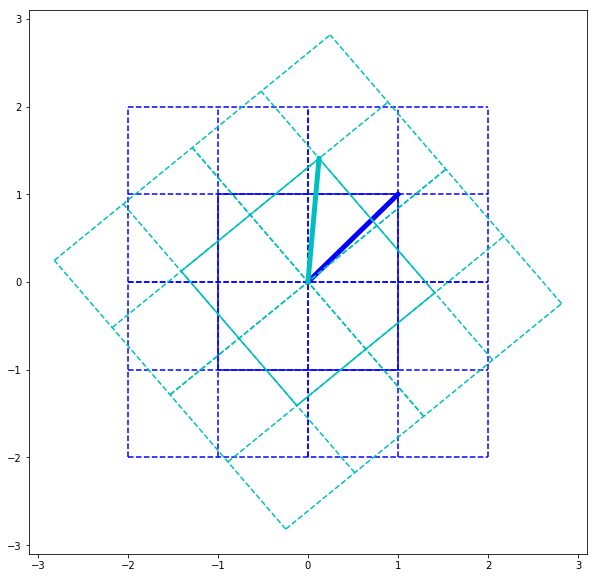

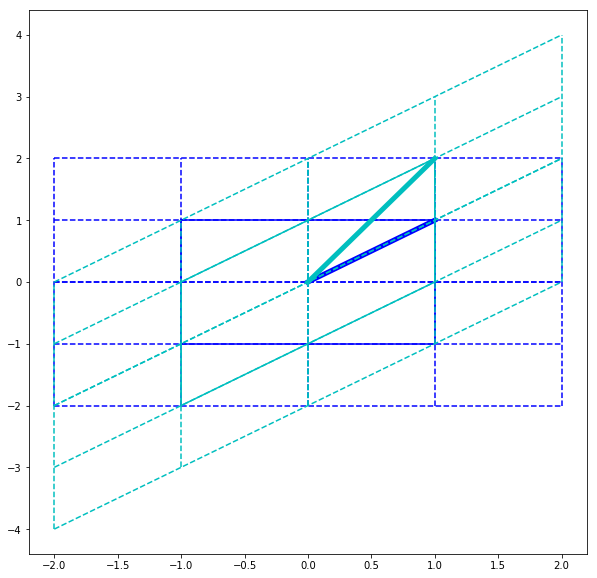

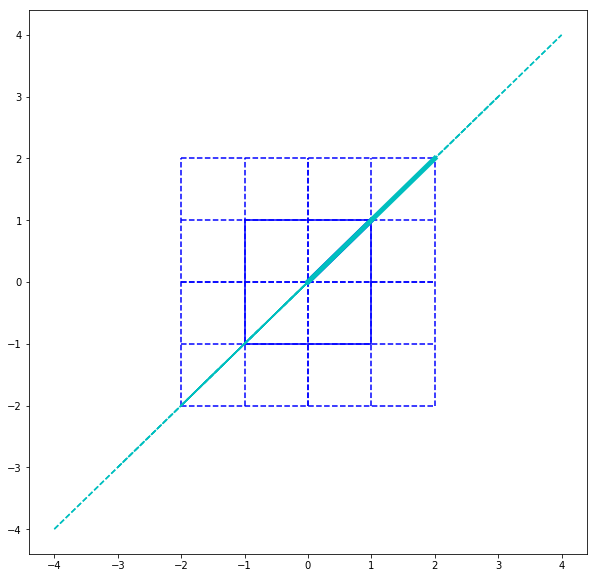

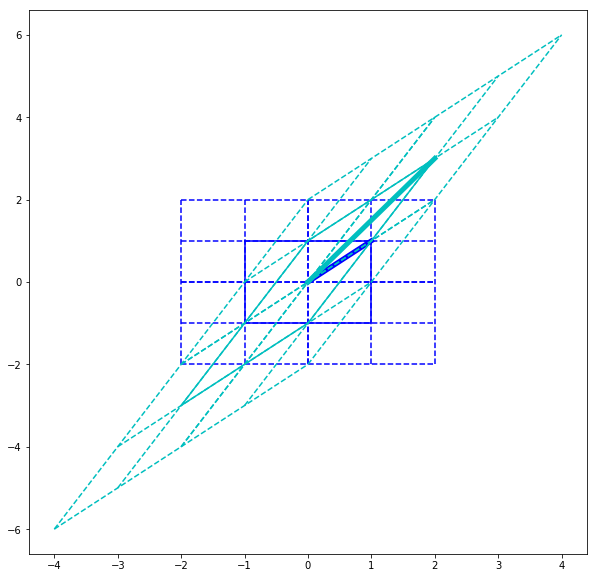

In [7]:

import time
#for i in range(1,90,10):    
#    lt=Linear_Transform(angle=i)
#    time.sleep(.1)
phi=np.deg2rad(40)
matrix1=np.array([[math.cos(phi),math.sin(phi)],
                [-math.sin(phi),math.cos(phi)]])
matrix2=np.array([[1 , 1],
                 [0 , 1]])
matrix3=np.array([[1 , 1],
                 [1 , 1]])
matrix4=np.array([[1 , 1],
                 [1 , 2]])
vect=[[0,0],
      [1,1]]
#vect=[[1,1]]
vect=np.array(vect,dtype=np.float64)
mats = [matrix1,matrix2,matrix3,matrix4]
for mat in mats:
    lt=Linear_Transform(vect,mat)

In [22]:
frame=np.ones((4,4,3),dtype=np.uint8)
points=Draw_Box(0,0)#[:-1]
ax1,ax2=Draw_Grid(0,0,4,4)
vect=Draw_Vect(1,1)
rpoints=rotate(points,angle)
rax1=rotate(ax1,angle)
rax2=rotate(ax2,angle)
rvect=rotate(vect,angle)

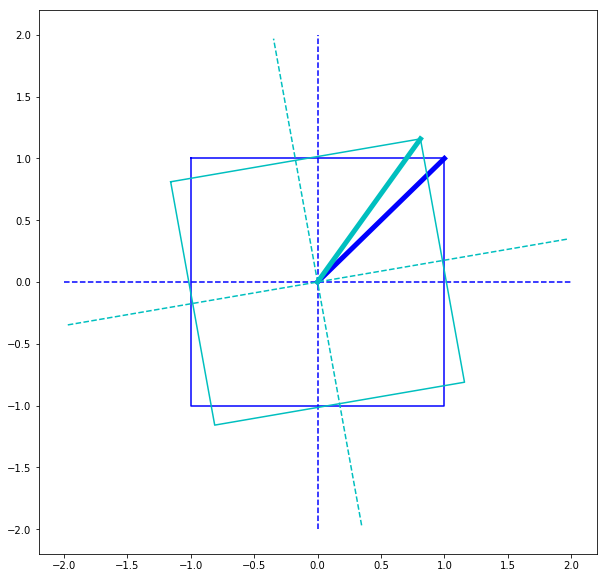

In [51]:
fig,ax=plt.subplots(nrows=1,ncols=1,figsize=(10,10))
#ax.imshow(frame)
ax.plot(points[:,0],points[:,1],color='b')
ax.plot(ax1[:,0],ax1[:,1],'b--',)
ax.plot(ax2[:,0],ax2[:,1],'b--')
ax.plot(vect[:,0],vect[:,1],'b',linewidth=5)

ax.plot(rax1[:,0],rax1[:,1],'c--')
ax.plot(rax2[:,0],rax2[:,1],'c--')
ax.plot(rpoints[:,0],rpoints[:,1],color='c')
ax.plot(rvect[:,0],rvect[:,1],'c',linewidth=5)


#ax.plot(points[:,0],points[:,1])
plt.show()
#cv2.waitKey(0)
#cv2.destroyAllWindows()

In [49]:
rvect[:,1]

array([0.        , 1.15845593])

In [53]:
np.mean(points,axis=0)

array([   0.,  100.,    0., -100.,    0.])

In [54]:
points

array([[-100.,  100.],
       [ 100.,  100.],
       [ 100., -100.],
       [-100., -100.],
       [-100.,  100.]])